In [49]:
from dask.distributed import Client
import dask
import jax.numpy as jnp
import numpy as np
import xarray

from jax import grad, jit, vmap, pmap
from jax import device_put
import os
from pyslime import slime
from pyslime import utils as pu
from pyslime.pipeline import pipelineUtils as ppu
import dask.array as da
import matplotlib.pyplot as plt
sdss_slime_dir = '/Volumes/GoogleDrive/.shortcut-targets-by-id/15147DgF0hJIq6mak7En23k0fNukBp6RO/2021-10-18/SDSS_z=0.1_float32_rerouting-to-data'
sdss_datafile = 'trace.bin'

In [50]:
Client()

/Users/mwilde/opt/anaconda3/lib/python3.8/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 54288 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:54288/status,
Dashboard: http://127.0.0.1:54288/status,Workers: 4
Total threads: 8,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:54289,Workers: 4
Dashboard: http://127.0.0.1:54288/status,Total threads: 8
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:54302,Total threads: 2
Dashboard: http://127.0.0.1:54307/status,Memory: 8.00 GiB
Nanny: tcp://127.0.0.1:54295,


In [2]:
bpDensityFile = '/Users/mwilde/Dropbox/slime-mold/data/final_data/BP_0214_densities_1024_0.bin'
rho_m = np.fromfile(bpDensityFile, dtype=np.float64)
rho_m = np.reshape(rho_m, (1024, 1024, 1024))

In [3]:
logrhom = np.log10(rho_m)

In [8]:
logrhom.shape

(1024, 1024, 1024)

In [51]:
sdss_slime32 = pu.get_slime(sdss_slime_dir, datafile=sdss_datafile, dtype=np.float32, standardize=False)

/Users/mwilde/python/pyslime/pyslime/utils.py:331: RuntimeWarning: divide by zero encountered in log10
  


In [52]:
# xa = xarray.DataArray(logrhom, dims=["x", "y", "z"])
xa = xarray.DataArray(sdss_slime32.data, dims=["x", "y", "z"])

<xarray.DataArray (x: 608, y: 1024, z: 624)>
array([[[-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        ...,
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf]],

       [[-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        ...,
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf]],

       [[-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        ...,
...
        ...,
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf]],

       [[-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        ...,
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf]],

       [[-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        ...,
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf]]], dtype=float32)
Dimensions without coordinates: x, y, z

In [ ]:
raw_xarr = xarray.open_zarr(datafile)
raw_data = raw_xarr[list(raw_xarr.data_vars)[0]]

In [55]:
dset = xarray.Dataset({"logdens":xa})

In [56]:
dset_chuncks = dset.chunk({"x":128, "y":128, "z":128})

In [57]:
dset_chuncks.to_zarr("/Users/mwilde/Desktop/sdss_slime.zarr")

In [18]:
bpdens = xarray.open_zarr("/Users/mwilde/Desktop/bplogrhom.zarr")

In [58]:
slime.Slime.get_slime("/Users/mwilde/Desktop/bplogrhom.zarr")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mwilde/Desktop/bplogrhom.zarr/export_metadata.txt'

In [40]:
data= bpdens[list(bpdens.data_vars)[0]]

(array([2.000000e+00, 1.000000e+00, 4.000000e+00, 5.000000e+00,
        2.000000e+00, 7.000000e+00, 1.300000e+01, 8.000000e+00,
        1.500000e+01, 2.100000e+01, 2.600000e+01, 3.900000e+01,
        5.000000e+01, 6.100000e+01, 7.800000e+01, 9.600000e+01,
        1.800000e+02, 1.950000e+02, 2.560000e+02, 3.220000e+02,
        4.230000e+02, 4.890000e+02, 5.540000e+02, 6.810000e+02,
        8.190000e+02, 1.026000e+03, 1.220000e+03, 1.306000e+03,
        1.512000e+03, 1.852000e+03, 2.119000e+03, 2.407000e+03,
        2.897000e+03, 3.321000e+03, 3.833000e+03, 4.590000e+03,
        5.019000e+03, 5.803000e+03, 6.677000e+03, 7.554000e+03,
        8.439000e+03, 9.486000e+03, 1.059900e+04, 1.194600e+04,
        1.370300e+04, 1.510600e+04, 1.690500e+04, 1.896800e+04,
        2.111800e+04, 2.374000e+04, 2.606700e+04, 2.900400e+04,
        3.197700e+04, 3.523900e+04, 3.917300e+04, 4.260500e+04,
        4.711900e+04, 5.190400e+04, 5.657800e+04, 6.169700e+04,
        6.676900e+04, 7.276600e+04, 7.90

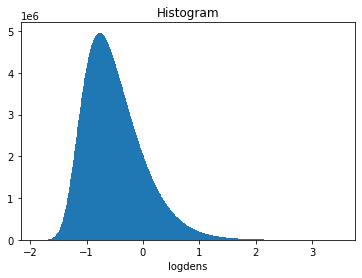

In [26]:
bpdens.logdens.plot.hist(bins=1000);

In [54]:
bins = np.linspace(0, 4, 500)
z = dask.delayed(np.histogram)(b, bins);

In [28]:
bpdens.logdens.mean("x").compute()

<xarray.DataArray 'logdens' (y: 1024, z: 1024)>
array([[-0.59089597, -0.60281966, -0.61110394, ..., -0.57527327,
        -0.57522094, -0.5804355 ],
       [-0.58930624, -0.59820923, -0.60407543, ..., -0.5793288 ,
        -0.57867993, -0.58185055],
       [-0.59156974, -0.59710405, -0.60024948, ..., -0.58469482,
        -0.5851489 , -0.58709007],
       ...,
       [-0.60947015, -0.62602472, -0.63643954, ..., -0.57175332,
        -0.57844738, -0.59200826],
       [-0.60263045, -0.61878614, -0.62964155, ..., -0.57000525,
        -0.57498535, -0.58651176],
       [-0.59593537, -0.61031186, -0.62027823, ..., -0.5718814 ,
        -0.57419373, -0.5824666 ]])
Dimensions without coordinates: y, z

In [29]:
np.mean(logrhom, axis=0)

array([[-0.59089597, -0.60281966, -0.61110394, ..., -0.57527327,
        -0.57522094, -0.5804355 ],
       [-0.58930624, -0.59820923, -0.60407543, ..., -0.5793288 ,
        -0.57867993, -0.58185055],
       [-0.59156974, -0.59710405, -0.60024948, ..., -0.58469482,
        -0.5851489 , -0.58709007],
       ...,
       [-0.60947015, -0.62602472, -0.63643954, ..., -0.57175332,
        -0.57844738, -0.59200826],
       [-0.60263045, -0.61878614, -0.62964155, ..., -0.57000525,
        -0.57498535, -0.58651176],
       [-0.59593537, -0.61031186, -0.62027823, ..., -0.5718814 ,
        -0.57419373, -0.5824666 ]])

In [55]:
from dask import compute

In [58]:
# https://github.com/dask/distributed/issues/5498
big_future = client.scatter(z)

CommClosedError: in <closed TCP>: BrokenPipeError: [Errno 32] Broken pipe

In [ ]:
future = client.submit(func, big_future)

In [56]:
y, x, = compute(z)

distributed.protocol.core - CRITICAL - Failed to Serialize
Traceback (most recent call last):
  File "/Users/mwilde/opt/anaconda3/lib/python3.8/site-packages/distributed/protocol/core.py", line 72, in dumps
    return {"__Serialized__": offset}
  File "/Users/mwilde/opt/anaconda3/lib/python3.8/site-packages/msgpack/__init__.py", line 35, in packb
    return Packer(**kwargs).pack(o)
  File "msgpack/_packer.pyx", line 292, in msgpack._cmsgpack.Packer.pack
  File "msgpack/_packer.pyx", line 298, in msgpack._cmsgpack.Packer.pack
  File "msgpack/_packer.pyx", line 295, in msgpack._cmsgpack.Packer.pack
  File "msgpack/_packer.pyx", line 264, in msgpack._cmsgpack.Packer._pack
  File "msgpack/_packer.pyx", line 231, in msgpack._cmsgpack.Packer._pack
  File "msgpack/_packer.pyx", line 264, in msgpack._cmsgpack.Packer._pack
  File "msgpack/_packer.pyx", line 202, in msgpack._cmsgpack.Packer._pack
ValueError: bytes object is too large
distributed.comm.utils - ERROR - bytes object is too large
Tra

CancelledError: histogram-969b7c86-1330-41d9-ab55-54bd6ce6925a

In [42]:
import zarr
z = zarr.create((128, 128, 128), dtype=float, store=zarr.ZipStore("output.zarr"))

In [43]:
.to_zarr(z)

distributed.protocol.core - CRITICAL - Failed to Serialize
Traceback (most recent call last):
  File "/Users/mwilde/opt/anaconda3/lib/python3.8/site-packages/distributed/protocol/core.py", line 72, in dumps
    frames[0] = msgpack.dumps(msg, default=_encode_default, use_bin_type=True)
  File "/Users/mwilde/opt/anaconda3/lib/python3.8/site-packages/msgpack/__init__.py", line 35, in packb
    return Packer(**kwargs).pack(o)
  File "msgpack/_packer.pyx", line 292, in msgpack._cmsgpack.Packer.pack
  File "msgpack/_packer.pyx", line 298, in msgpack._cmsgpack.Packer.pack
  File "msgpack/_packer.pyx", line 295, in msgpack._cmsgpack.Packer.pack
  File "msgpack/_packer.pyx", line 264, in msgpack._cmsgpack.Packer._pack
  File "msgpack/_packer.pyx", line 231, in msgpack._cmsgpack.Packer._pack
  File "msgpack/_packer.pyx", line 264, in msgpack._cmsgpack.Packer._pack
  File "msgpack/_packer.pyx", line 202, in msgpack._cmsgpack.Packer._pack
ValueError: bytes object is too large
distributed.comm.util

CancelledError: store-1fc8b580-4d65-11ec-8355-acde48001122

# try making a zarr file and then reading it in, dealing with it that way

In [46]:
a

dask.array<array, shape=(1024, 1024, 1024), dtype=float64, chunksize=(128, 128, 128), chunktype=numpy.ndarray>

In [45]:
zarr.save('example.zarr', a)

TypeError: unsupported operand type(s) for /: 'int' and 'list'